# Introduction
The goal of this notebook is to answer the following questions (MC = Martinotti cell):
1. How many MCs in 2P volume 3? (Can define this crudely as 340 - 425 microns deep.)

    **Answer: 75 in total; 10 are in this depth range.**

1. How many are proofread?
    
    **Answer: Axon proofreading: 2 MCs are in_progress but neither are in the volume. Dendrite proofreading: 3 in volume are allen_qa.**
    
1. What are their synaptic distributions?
    - Horizontal distance from pre-/postsynaptic soma to MC soma
    - Depth distribution of pre-/postsynaptic soma
1. How many pre-/postsynaptic cells are PYR cells that have been 2P corresponded?

In [73]:
import sys
if "../.." not in sys.path: sys.path.insert(0, "../..")
if ".." not in sys.path: sys.path.insert(0, "..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from experiment.v1dd_em_client import V1DDEMClient
import analysis_tools as at
at.set_stylesheet()
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
em_client = V1DDEMClient()

/opt/anaconda3/envs/v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:21: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


## Find Martinotti cells

In [4]:
cell_type_table = em_client.get_cell_type_table()
cell_type_table.head(10)

,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,dendrite_proofreading_status
0,0,1132,t,350562,coarse_manual,PYC,350562,t,326.965400,94866276031228266,864691132773514104,"[894573, 478559, 163530]","[891003, 473981, 17111]","[898608, 483370, 18134]","[-13.227572489957907, 226.5862979342913, -382....",not_started,not_started
1,1,214,t,383955,coarse_manual,PYC,383955,t,504.192300,95649060060623076,864691132569667100,"[920802, 795478, 329220]","[914826, 790822, 34920]","[926389, 800366, 36123]","[14.741818935006158, 576.1578669978572, -307.2...",not_started,not_started
2,2,13,t,385028,coarse_manual,PYC,385028,t,415.785065,95863052645657911,864691132985016672,"[929338, 898530, 386595]","[924914, 892245, 41162]","[933994, 903885, 42103]","[23.848399659480666, 690.7637364002102, -279.5...",not_started,not_started
3,3,717,t,293764,coarse_manual,PYC,293764,t,231.369357,94450111081742956,864691132625300120,"[878665, 697702, 245475]","[874009, 694365, 26030]","[883554, 701349, 26859]","[-27.97517873296875, 459.74380331495826, -361....",not_started,not_started
4,4,2604,t,351373,coarse_manual,PYC,351373,t,277.321739,96276193669654108,864691132689074198,"[944314, 572378, 210330]","[939814, 568187, 22179]","[948505, 576413, 23110]","[37.02512562261708, 329.260361441734, -362.108...",not_started,not_started
5,5,3107,t,384793,coarse_manual,Non-neuronal,384793,t,176.705265,96002003427327315,864691133121193317,"[934304, 833734, 374445]","[928794, 830786, 39867]","[940434, 836606, 40890]","[28.48738755819702, 625.0561090808981, -273.94...",not_started,not_started
6,6,3126,t,384639,coarse_manual,PYC,384639,t,255.960178,96987371937497920,864691132805623033,"[968215, 841029, 365895]","[963171, 837459, 39018]","[972949, 844754, 39828]","[62.42156172336766, 629.6272960895836, -284.13...",not_started,not_started
7,7,3510,t,397015,coarse_manual,PYC,397015,t,286.041850,98398182660372459,864691132985597280,"[1018267, 966741, 305775]","[1013146, 962473, 32534]","[1023156, 971397, 33344]","[112.99574837787077, 734.4076867037824, -375.7...",not_started,not_started
8,8,2131,t,266732,coarse_manual,Non-neuronal,266732,t,190.102206,91346052585924801,864691132697512582,"[769870, 413841, 332595]","[766455, 409030, 35449]","[773594, 419506, 36322]","[-138.01414299146796, 210.1077240338913, -201....",not_started,not_started
9,9,1578,t,278239,coarse_manual,PYC,278239,t,258.657505,92547406344001512,864691132679400495,"[812006, 598296, 286875]","[807894, 594028, 30477]","[816274, 602642, 31331]","[-95.05493981461576, 375.38068857135727, -295....",not_started,not_started


In [5]:
mc_cells = cell_type_table[cell_type_table.cell_type == "MC"]
print(f"There are {len(mc_cells)} typed MC cells in total")
mc_cells.head()

There are 75 typed MC cells in total


,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,dendrite_proofreading_status
27,27,2694,t,278405,coarse_manual,MC,278405,t,336.579200,90436412738338039,864691132823412073,"[737898, 601710, 294075]","[732777, 597520, 31127]","[742554, 605668, 32199]","[-169.1360545116018, 380.96626861854804, -289....",not_started,allen_qa
68,68,3103,t,382939,coarse_manual,MC,382939,t,365.528991,96564884326155374,864691132680249683,"[954713, 832803, 276660]","[950367, 827604, 29372]","[959446, 838080, 30230]","[48.76137539402035, 597.8819747458596, -367.91...",not_started,not_started
163,163,2476,t,369459,coarse_manual,MC,369459,t,223.265724,95859204153225435,864691132937689227,"[929493, 759782, 302040]","[925147, 755126, 32146]","[933606, 764670, 32951]","[23.2252972938983, 534.446067466164, -323.9109...",not_started,not_started
194,194,2541,t,276437,coarse_manual,MC,276437,t,285.529970,90505269452366633,864691132669133740,"[739528, 547468, 211320]","[734484, 542191, 22208]","[744184, 552279, 23304]","[-167.87648645143548, 306.54409281406834, -354...",not_started,not_started
247,247,2936,t,296839,coarse_manual,MC,296839,t,338.353029,94098130324441685,864691132633391957,"[868344, 692580, 377325]","[863688, 688157, 40114]","[873543, 696848, 41230]","[-38.14493156762456, 490.1543693092254, -233.3...",not_started,not_started


In [6]:
depth_range = [340, 425]
position_microns_y = mc_cells.position_microns.apply(lambda pos: pos[1])
mc_cells_in_volume = mc_cells[(depth_range[0] <= position_microns_y) & (position_microns_y <= depth_range[1])]
print(f"There are {len(mc_cells_in_volume)} typed MC cells in depth range ({depth_range[0]}, {depth_range[1]})")
mc_cells_in_volume.head()

There are 10 typed MC cells in depth range (340, 425)


,index,id,valid,target_id,classification_system,cell_type,id_ref,valid__ref,volume,pt_supervoxel_id,pt_root_id,pt_position,bb_start_position,bb_end_position,position_microns,axon_proofreading_status,dendrite_proofreading_status
27,27,2694,t,278405,coarse_manual,MC,278405,t,336.579200,90436412738338039,864691132823412073,"[737898, 601710, 294075]","[732777, 597520, 31127]","[742554, 605668, 32199]","[-169.1360545116018, 380.96626861854804, -289....",not_started,allen_qa
309,309,1690,t,276456,coarse_manual,MC,276456,t,327.456956,91211224636842947,864691132770775571,"[764438, 627241, 210690]","[760247, 621731, 22121]","[768473, 633138, 23202]","[-142.5850436612497, 383.1122453549287, -376.4...",not_started,not_started
501,501,1757,t,369415,coarse_manual,MC,369415,t,307.799583,95081918085209694,864691132782970098,"[902410, 644313, 293895]","[897444, 640510, 31181]","[907222, 648658, 32126]","[-4.422008686702349, 421.1469265512653, -300.8...",not_started,not_started
764,764,1732,t,369675,coarse_manual,MC,369675,t,356.376127,94800305736531810,864691132630522210,"[891003, 637794, 312705]","[885494, 631043, 33126]","[897366, 642916, 34217]","[-15.835068949671463, 419.95783704373207, -280...",not_started,not_started
2276,2279,1575,t,278505,coarse_manual,MC,278505,t,336.009601,92406668922503465,864691133121058917,"[807661, 597830, 300915]","[802927, 593097, 31937]","[812472, 602719, 32956]","[-99.38341323076317, 378.7116193209634, -281.6...",not_started,allen_qa


In [7]:
# How many have been proofread
print("========== AXON PROOFREADING STATUS ==========")
print("All typed cells:")
print(cell_type_table.axon_proofreading_status.value_counts())
print("\nTyped MCs:")
print(mc_cells.axon_proofreading_status.value_counts())
print("\nTyped MCs in volume:")
print(mc_cells_in_volume.axon_proofreading_status.value_counts())
print("\n========== DENDRITE PROOFREADING STATUS ==========")
print("All typed cells:")
print(cell_type_table.dendrite_proofreading_status.value_counts())
print("\nTyped MCs:")
print(mc_cells.dendrite_proofreading_status.value_counts())
print("\nTyped MCs in volume:")
print(mc_cells_in_volume.dendrite_proofreading_status.value_counts())

========== AXON PROOFREADING STATUS ==========
All typed cells:
not_started    3734
in_progress      23
ariadne_qa        3
Name: axon_proofreading_status, dtype: int64

Typed MCs:
not_started    73
in_progress     2
Name: axon_proofreading_status, dtype: int64

Typed MCs in volume:
not_started    10
Name: axon_proofreading_status, dtype: int64

========== DENDRITE PROOFREADING STATUS ==========
All typed cells:
not_started    2882
allen_qa        578
ariadne_qa      195
in_progress     105
Name: dendrite_proofreading_status, dtype: int64

Typed MCs:
not_started    59
allen_qa        9
in_progress     5
ariadne_qa      2
Name: dendrite_proofreading_status, dtype: int64

Typed MCs in volume:
not_started    7
allen_qa       3
Name: dendrite_proofreading_status, dtype: int64


## Query for synapses
Get all the dendritic and axonal synapses of the 10 MCs in the volume. This takes a minute or two to run.

In [8]:
mc_pt_root_ids = mc_cells_in_volume.pt_root_id.values
print(f"Loading dendritic synapses for {len(mc_pt_root_ids)} MCs in volume...")
dendritic_synapses = em_client.get_dendritic_synapses(mc_pt_root_ids)
print(f"Done. Loading axonal synapses for {len(mc_pt_root_ids)} MCs in volume...")
axonal_synapses = em_client.get_axonal_synapses(mc_pt_root_ids)
print(f"Done. There are {len(dendritic_synapses):,} total dendritic synapses and {len(axonal_synapses):,} total axonal synapses.")

Loading dendritic synapses for 10 MCs in volume...
Done. Loading axonal synapses for 10 MCs in volume...
Done. There are 83,322 total dendritic synapses and 56,292 total axonal synapses.


In [9]:
corresponded_table = em_client.get_2p_corresponded_table()
corresponded_table.head()

,index,id,valid,classification_system,cell_type,pt_supervoxel_id,pt_root_id,pt_position,roi_lookup,position_microns
0,0,91,t,session13,plane2_0032,92618530666908453,864691132735860016,"[90593, 69633, 3833]",1-3-3-32,"[-91.74018974735705, 372.1078594762103, -413.1..."
1,1,90,t,session13,plane2_014,92055099945608124,864691132710145793,"[88274, 67650, 5900]",1-3-3-14,"[-112.57258685416217, 379.9149525558736, -318...."
2,2,55,t,session13,plane0_roi_0060,93180175218572599,864691132760377194,"[92791, 64340, 5745]",1-3-1-60,"[-72.07225703497906, 349.1430176136275, -317.4..."
3,3,43,t,session13,plane1_roi_0030,91843650048621008,864691132720617684,"[87483, 66110, 5411]",1-3-2-30,"[-119.78729184255074, 360.70596673244506, -336..."
4,4,98,t,session13,plane0_0067,94939531261931905,864691132801571037,"[99750, 64882, 5727]",1-3-1-67,"[-9.419717374440399, 353.3143604594122, -319.5..."


In [10]:
for mc_pt_root_id in mc_pt_root_ids:
    print(f"\n=== {mc_pt_root_id} ===")

    cell_dendritic_syn = dendritic_synapses[dendritic_synapses.post_pt_root_id == mc_pt_root_id]
    cell_axonal_syn = axonal_synapses[axonal_synapses.pre_pt_root_id == mc_pt_root_id]
    unique_presyn_ids = cell_dendritic_syn.pre_pt_root_id.unique()
    unique_postsyn_ids = cell_axonal_syn.post_pt_root_id.unique()
    n_corresponded_presyn = np.isin(cell_dendritic_syn.pre_pt_root_id, corresponded_table.pt_root_id).sum()
    n_corresponded_postsyn = np.isin(cell_axonal_syn.post_pt_root_id, corresponded_table.pt_root_id).sum()
    n_corresponded_presyn_unique = np.isin(unique_presyn_ids, corresponded_table.pt_root_id).sum()
    n_corresponded_postsyn_unique = np.isin(unique_postsyn_ids, corresponded_table.pt_root_id).sum()

    print(f"  Dendritic synapses (corresponded/total): {n_corresponded_presyn:,} / {len(cell_dendritic_syn):,}")
    print(f"  Dendritic synapses, unique: {n_corresponded_presyn_unique} / {len(unique_presyn_ids):,}")

    print(f"  Axonal synapses (corresponded/total): {n_corresponded_postsyn:,} / {len(cell_axonal_syn):,}")
    print(f"  Axonal synapses, unique: {n_corresponded_postsyn_unique} / {len(unique_postsyn_ids):,}")


=== 864691132823412073 ===
  Dendritic synapses (corresponded/total): 12 / 11,343
  Dendritic synapses, unique: 11 / 9,461
  Axonal synapses (corresponded/total): 18 / 7,059
  Axonal synapses, unique: 10 / 3,557

=== 864691132770775571 ===
  Dendritic synapses (corresponded/total): 6 / 10,187
  Dendritic synapses, unique: 3 / 8,489
  Axonal synapses (corresponded/total): 6 / 4,289
  Axonal synapses, unique: 5 / 2,543

=== 864691132782970098 ===
  Dendritic synapses (corresponded/total): 49 / 10,474
  Dendritic synapses, unique: 23 / 9,280
  Axonal synapses (corresponded/total): 119 / 8,903
  Axonal synapses, unique: 37 / 5,561

=== 864691132630522210 ===
  Dendritic synapses (corresponded/total): 19 / 10,951
  Dendritic synapses, unique: 14 / 10,009
  Axonal synapses (corresponded/total): 12 / 11,785
  Axonal synapses, unique: 9 / 6,941

=== 864691133121058917 ===
  Dendritic synapses (corresponded/total): 16 / 10,091
  Dendritic synapses, unique: 12 / 8,782
  Axonal synapses (corresp

## For a single Martinotti cell, examine visual response properties of (a) presynaptic and (b) postsynaptic neurons

In [13]:
# This is an example MC that has a lot of synapses from/on 2P-corresponded cells
mc_pt_root_id = 864691132782970098

In [14]:
# Load metrics since we'll need that too
from stimulus_analysis import fit_utils

metrics = pd.read_csv("/Users/chase/Desktop/MindScope/Documents/v1dd-chase/dataframes/v1dd_metrics.csv", index_col=0, low_memory=False)

# Only consider valid metrics
metrics = metrics[metrics.is_valid & (metrics.mouse == 409828) & (metrics.column == 1)]
metrics.insert(5, "roi_lookup", metrics.apply(lambda row: f"{row.column}-{row.volume}-{row.plane}-{row.roi}", axis=1))
metrics["ssi_fit"] = fit_utils.compute_dg_fit_ssi_from_metrics(metrics)
metrics["dgw_pref_dir_fit"] = fit_utils.get_dg_pref_dir(metrics, "dgw")
metrics["dgf_pref_dir_fit"] = fit_utils.get_dg_pref_dir(metrics, "dgf")

roi_lookup_to_metrics_idx = pd.Series(data=metrics.index, index=metrics.roi_lookup.values)

metrics.head()

,mouse,column,volume,plane,roi,roi_lookup,is_valid,depth,dgf_pref_response,dgf_pref_dir,...,ssi,ffsi,ssi_pref_both,ssi_orth,ffsi_all_dirs,spontaneous_event_mean,spontaneous_event_std,ssi_fit,dgw_pref_dir_fit,dgf_pref_dir_fit
M409828_11_1_89,409828,1,1,1,89,1-1-1-89,True,50,0.000943,330.0,...,0.265065,0.419054,0.033453,-0.139243,"[0.41905364, 0.61911654, 0.07141414, -0.801465...",0.000287,0.001903,0.173092,351.613700,63.683119
M409828_11_2_0,409828,1,1,2,0,1-1-2-0,True,66,0.000919,270.0,...,-0.084075,-0.183585,-0.088211,0.064530,"[-0.18358487, 0.04251838, -0.30215508, -0.1352...",0.000346,0.002629,-0.076999,46.319837,71.813432
M409828_11_2_1,409828,1,1,2,1,1-1-2-1,True,66,0.011217,0.0,...,-0.065169,-0.139425,-0.157938,0.044509,"[-4.483465, -0.13942526, -0.10395071, 1.0, -1....",0.000341,0.002262,-0.357757,20.629574,14.344481
M409828_11_2_2,409828,1,1,2,2,1-1-2-2,True,66,0.001237,120.0,...,0.536319,0.698187,-0.005231,-0.203358,"[-0.3096417, 0.6981869, 0.36546794, 0.25718334...",0.000341,0.002412,0.238414,360.000000,63.556494
M409828_11_2_4,409828,1,1,2,4,1-1-2-4,True,66,0.001093,240.0,...,-0.034136,-0.070685,-0.278688,-0.394162,"[-1.098053, -0.15058127, -0.28383604, -2.51381...",0.000234,0.001601,-0.131294,349.940152,323.599541


In [15]:
corresponding_roi = pd.Series(data=corresponded_table.roi_lookup.values, index=corresponded_table.pt_root_id.values)
corresponding_roi.head()

864691132735860016    1-3-3-32
864691132710145793    1-3-3-14
864691132760377194    1-3-1-60
864691132720617684    1-3-2-30
864691132801571037    1-3-1-67
dtype: object

(a) First examine presynaptic cells

In [133]:
cell_den_syn = dendritic_synapses[dendritic_synapses.post_pt_root_id == mc_pt_root_id]
print(f"{len(cell_den_syn):,} rows")
cell_den_syn.head()

10,474 rows


,index,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,position_microns,pre_soma_position,post_soma_position
10,10,457645374,t,95363255756905645,864691132739753369,95292887012697142,864691132782970098,1044,"[93898, 65814, 7349]","[93881, 65805, 7342]","[93878, 65808, 7344]","[3.8334197367437883, 425.0897811919907, -264.0...","[24.888653725584504, 494.5348293198027, -277.6...","[-4.422008686702349, 421.1469265512653, -300.8..."
36,36,457646123,t,95433693220444742,864691132786044348,95363324476261272,864691132782970098,2587,"[94158, 66066, 7262]","[94109, 66038, 7255]","[94129, 66066, 7254]","[6.050615197377512, 426.2083798736269, -268.45...",None,"[-4.422008686702349, 421.1469265512653, -300.8..."
38,38,519016667,t,97473562101271570,864691132278939908,97473562101274902,864691132782970098,492,"[101742, 62938, 7176]","[101741, 62918, 7184]","[101756, 62928, 7181]","[79.9306949023126, 395.8254554407017, -263.432...",None,"[-4.422008686702349, 421.1469265512653, -300.8..."
60,60,446863400,t,94872873436750427,864691132957090513,94872873436759889,864691132782970098,1210,"[92157, 74101, 6393]","[92181, 74099, 6404]","[92181, 74101, 6403]","[-12.326772604929749, 491.3877048078616, -326....",None,"[-4.422008686702349, 421.1469265512653, -300.8..."
63,63,480384827,t,95782581802604242,864691132854190880,95782581802596628,864691132782970098,770,"[95426, 55049, 5825]","[95485, 55061, 5819]","[95465, 55087, 5820]","[18.8008839239449, 306.2543393140738, -302.214...",None,"[-4.422008686702349, 421.1469265512653, -300.8..."


In [134]:
cell_den_syn_has_ophys = cell_den_syn[cell_den_syn.pre_pt_root_id.isin(corresponded_table.pt_root_id)]
print(f"{len(cell_den_syn_has_ophys):,} rows")
cell_den_syn_has_ophys.head()

49 rows


,index,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,position_microns,pre_soma_position,post_soma_position
4758,4779,408427345,t,93392106084731532,864691132754582962,93392106084740111,864691132782970098,591,"[86816, 62759, 5707]","[86809, 62761, 5710]","[86826, 62766, 5710]","[-65.0035963878932, 377.32360005293634, -326.9...","[-116.25441502719082, 372.3245112135671, -303....","[-4.422008686702349, 421.1469265512653, -300.8..."
6852,6888,446645746,t,95013817083629848,864691132719988723,95013817083626386,864691132782970098,984,"[92642, 74778, 6467]","[92628, 74828, 6465]","[92635, 74791, 6464]","[-7.95335481450148, 498.9140696460378, -325.53...","[-125.15125066634046, 346.6647280266727, -313....","[-4.422008686702349, 421.1469265512653, -300.8..."
9113,9155,460680471,t,95292680653264270,864691132801571037,95292680653261496,864691132782970098,1622,"[93831, 65144, 6058]","[93853, 65110, 6051]","[93849, 65108, 6051]","[3.4520818490629317, 403.0446066134006, -318.2...","[-9.415707832006506, 353.3162675363157, -319.5...","[-4.422008686702349, 421.1469265512653, -300.8..."
10293,10341,418143094,t,93955468355393600,864691132760197483,93955468355407496,864691132782970098,1452,"[88876, 64228, 6013]","[88911, 64216, 6022]","[88883, 64200, 6018]","[-44.52805303209275, 394.5786687706597, -317.1...","[-47.89515902186779, 371.0004188124802, -304.4...","[-4.422008686702349, 421.1469265512653, -300.8..."
12959,13025,434535202,t,94448324375221140,864691132635895079,94448324375218669,864691132782970098,115,"[90634, 65264, 5311]","[90620, 65254, 5311]","[90616, 65262, 5315]","[-27.945301399591845, 395.6326190892443, -350....","[-84.5002040614849, 375.5022308609855, -323.36...","[-4.422008686702349, 421.1469265512653, -300.8..."


In [194]:
# Get the 2P ROIs of the corresponded presynaptic cells and the corresponding metrics
presyn_rois = cell_den_syn_has_ophys.pre_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
metrics_idx = roi_lookup_to_metrics_idx[presyn_rois].values
presyn_metrics = metrics.loc[metrics_idx]

Analyze visual response properties of these ROIs

<AxesSubplot: >

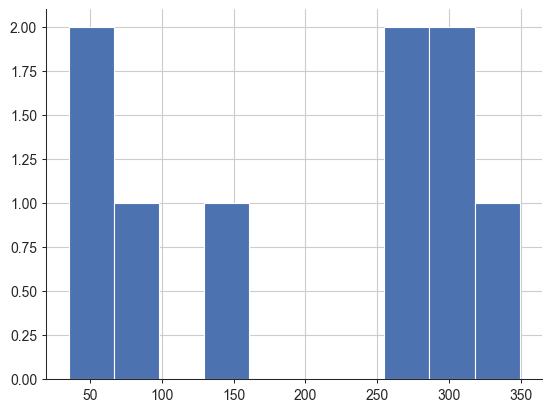

In [195]:
presyn_metrics[presyn_metrics.dgw_frac_responsive_trials >= 0.5].dgw_pref_dir_fit.hist()

<AxesSubplot: >

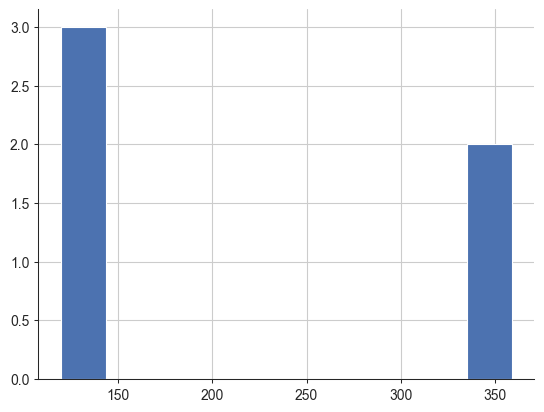

In [196]:
presyn_metrics[presyn_metrics.dgf_frac_responsive_trials >= 0.5].dgf_pref_dir_fit.hist()

<AxesSubplot: >

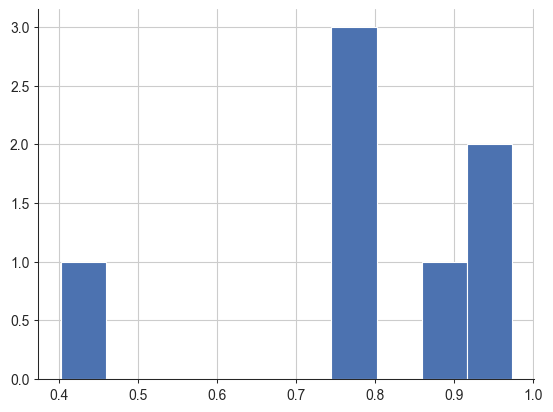

In [197]:
presyn_metrics[presyn_metrics.dgw_frac_responsive_trials >= 0.5].ssi_fit.hist()

(b) Do the same for postsynaptic cells

In [188]:
cell_axo_syn = axonal_synapses[axonal_synapses.pre_pt_root_id == mc_pt_root_id]
print(f"{len(cell_axo_syn):,} rows")

cell_axo_syn_has_ophys = cell_axo_syn[cell_axo_syn.post_pt_root_id.isin(corresponded_table.pt_root_id)]
print(f"{len(cell_axo_syn_has_ophys):,} rows have ophys")

postsyn_rois = cell_axo_syn_has_ophys.post_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
postsyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[postsyn_rois].values]

8,903 rows
119 rows have ophys


<AxesSubplot: >

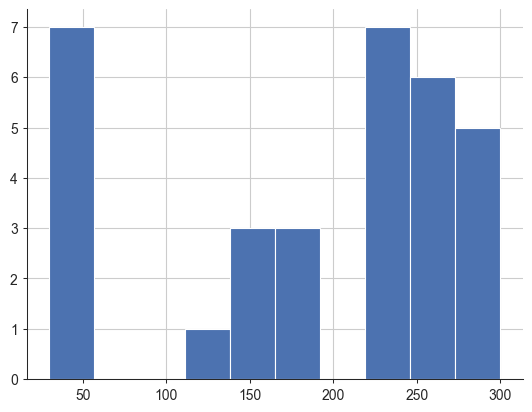

In [189]:
postsyn_metrics[postsyn_metrics.dgw_frac_responsive_trials >= 0.5].dgw_pref_dir.hist()

<AxesSubplot: >

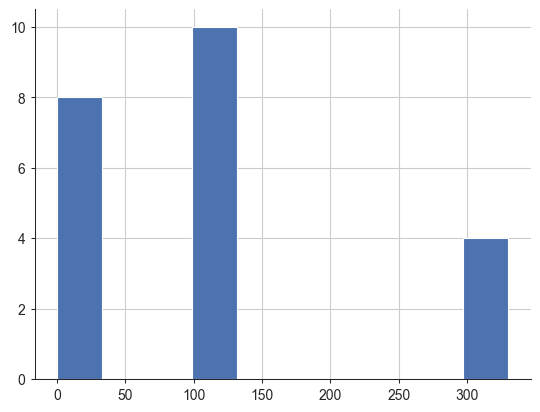

In [190]:
postsyn_metrics[postsyn_metrics.dgf_frac_responsive_trials >= 0.5].dgf_pref_dir.hist()

In [192]:
postsyn_metrics.roi_lookup.unique()

array(['1-3-5-109', '1-3-2-145', '1-3-3-158', '1-3-3-414', '1-3-4-212',
       '1-3-1-209', '1-3-1-671', '1-3-1-65', '1-3-3-14', '1-3-4-98',
       '1-3-3-250', '1-3-3-265', '1-3-3-74', '1-3-3-230', '1-3-3-139',
       '1-3-3-300', '1-3-1-88', '1-3-1-40', '1-3-1-60', '1-3-1-117',
       '1-3-4-89', '1-3-3-25', '1-3-6-470', '1-3-2-75', '1-3-3-269',
       '1-3-5-119', '1-3-5-419', '1-3-2-26', '1-3-4-387', '1-3-3-191',
       '1-3-1-67', '1-3-2-30', '1-3-3-237', '1-3-3-294', '1-3-3-215',
       '1-3-4-306', '1-3-2-667'], dtype=object)

## Visualize all MC cell distributions

In [30]:
dendritic_synapses

,index,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,position_microns,pre_soma_position,post_soma_position
0,0,367566357,t,91349350718354439,864691132729026229,91349350718349683,864691132546844738,1103,"[79418, 55015, 4514]","[79478, 55066, 4511]","[79454, 55053, 4512]","[-136.543288309476, 291.3180259709305, -358.93...",None,"[-137.95332250863942, 347.0839533928604, -272...."
1,1,358220849,t,90858212551021515,864691132747416296,90858212551017131,864691132770775571,328,"[77676, 60411, 3983]","[77650, 60382, 3984]","[77644, 60405, 3984]","[-154.05896145033208, 334.7408968026274, -395....",None,"[-142.5850436612497, 383.1122453549287, -376.4..."
2,2,338348431,t,90574332593913202,864691132938820967,90574332593910751,864691132546844738,651,"[76720, 51463, 5523]","[76669, 51479, 5516]","[76699, 51489, 5516]","[-163.8968617497402, 270.0359815871785, -306.0...",None,"[-137.95332250863942, 347.0839533928604, -272...."
3,3,425306088,t,93599157801379970,864691132783522357,93599157801376256,864691132770775571,955,"[87547, 47625, 5490]","[87509, 47581, 5490]","[87514, 47609, 5489]","[-58.93306277229917, 232.76912387943378, -297....",None,"[-142.5850436612497, 383.1122453549287, -376.4..."
4,4,429148061,t,94163413156590377,864691132598544271,94163413156591353,864691132770775571,487,"[89771, 52455, 3579]","[89772, 52407, 3579]","[89773, 52406, 3579]","[-36.872308273772475, 254.74358913424135, -392...",None,"[-142.5850436612497, 383.1122453549287, -376.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83317,83687,340365032,t,90504445221543275,864691132712055301,90504445221553961,864691133121058917,470,"[76223, 53372, 7986]","[76227, 53320, 7987]","[76246, 53349, 7986]","[-167.95040071477067, 317.02828761672464, -203...","[-74.45965800813084, 490.70150445470296, -249....","[-99.38341323076317, 378.7116193209634, -281.6..."
83318,83688,472757693,t,95924624826933797,864691131711936674,95924556107463744,864691132656476120,263,"[96029, 59784, 4886]","[96016, 59766, 4892]","[96023, 59778, 4889]","[24.114818669411704, 339.0346499170619, -354.6...",None,"[47.9745589016187, 346.39648610881903, -345.16..."
83319,83689,348216626,t,91138175900472780,864691132797123075,91138175900477525,864691132823412073,2400,"[78727, 54850, 5445]","[78750, 54854, 5440]","[78745, 54845, 5446]","[-143.55895996614115, 300.5623998087334, -318....",None,"[-169.1360545116018, 380.96626861854804, -289...."
83320,83690,477318819,t,96065774699221984,864691132092095000,96065774699212812,864691132656476120,601,"[96649, 61360, 5374]","[96693, 61347, 5373]","[96660, 61369, 5375]","[30.784028261697618, 359.571845196025, -337.87...",None,"[47.9745589016187, 346.39648610881903, -345.16..."


In [42]:
np.count_nonzero(~dendritic_synapses.pre_soma_position.isna())

6322

In [71]:
dendritic_synapses.head(1)

,index,id,valid,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,size,pre_pt_position,post_pt_position,ctr_pt_position,position_microns,pre_soma_position,post_soma_position
0,0,367566357,t,91349350718354439,864691132729026229,91349350718349683,864691132546844738,1103,"[79418, 55015, 4514]","[79478, 55066, 4511]","[79454, 55053, 4512]","[-136.543288309476, 291.3180259709305, -358.93...",None,"[-137.95332250863942, 347.0839533928604, -272...."


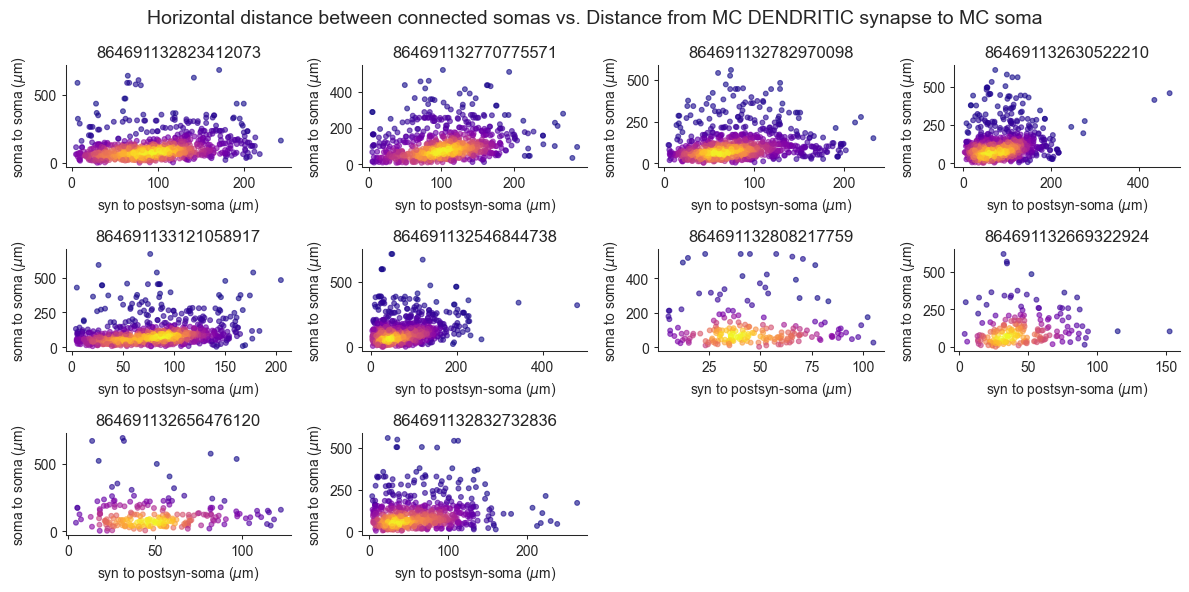

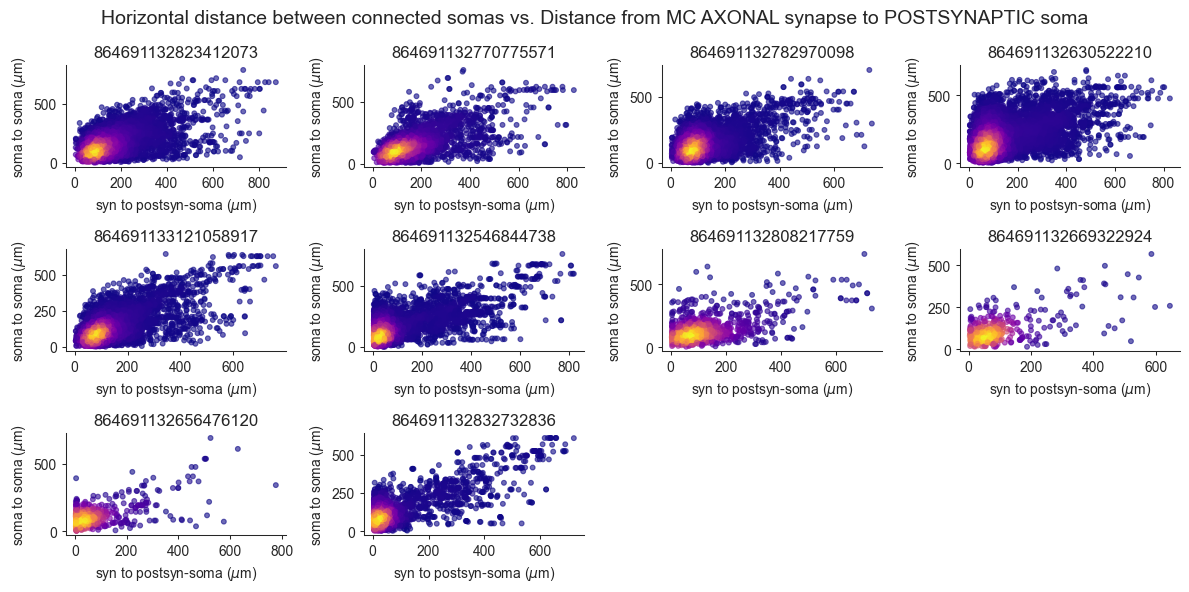

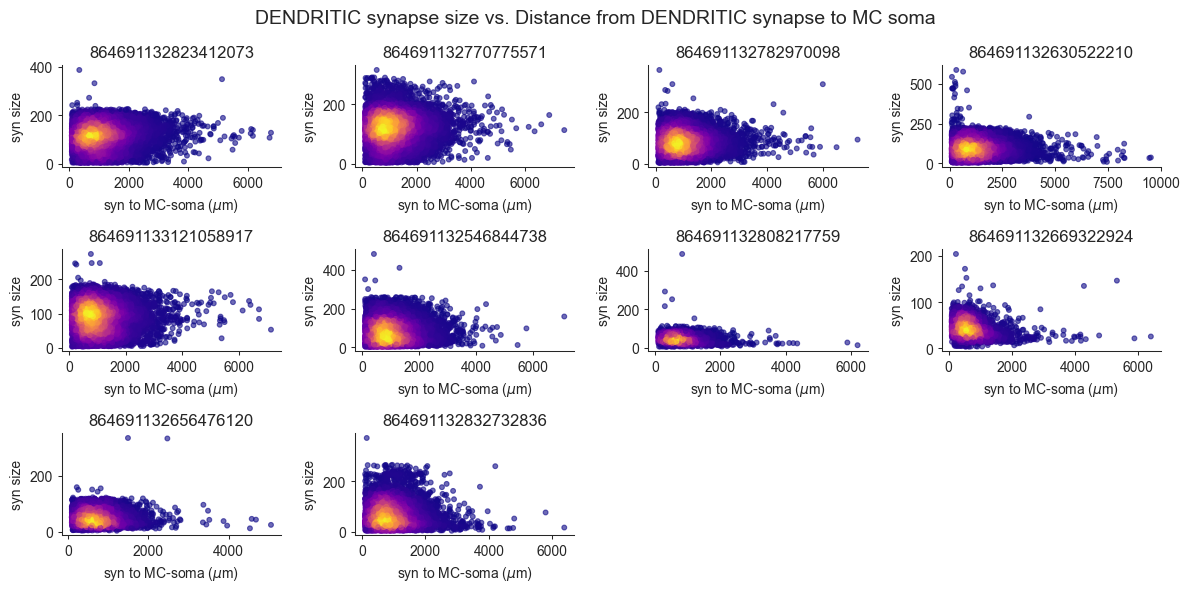

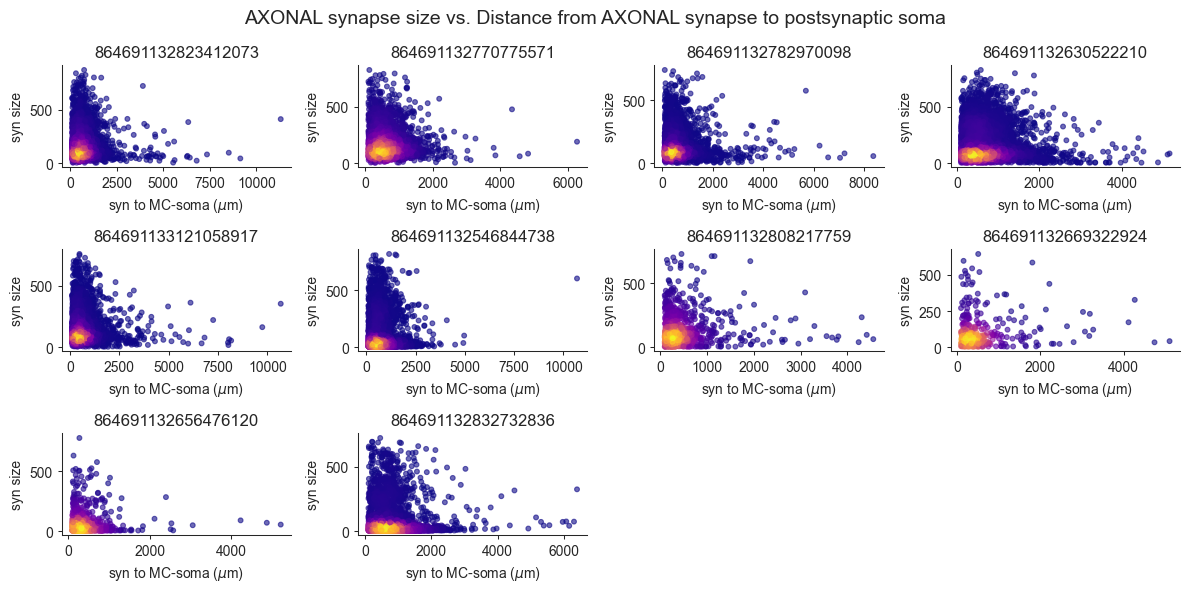

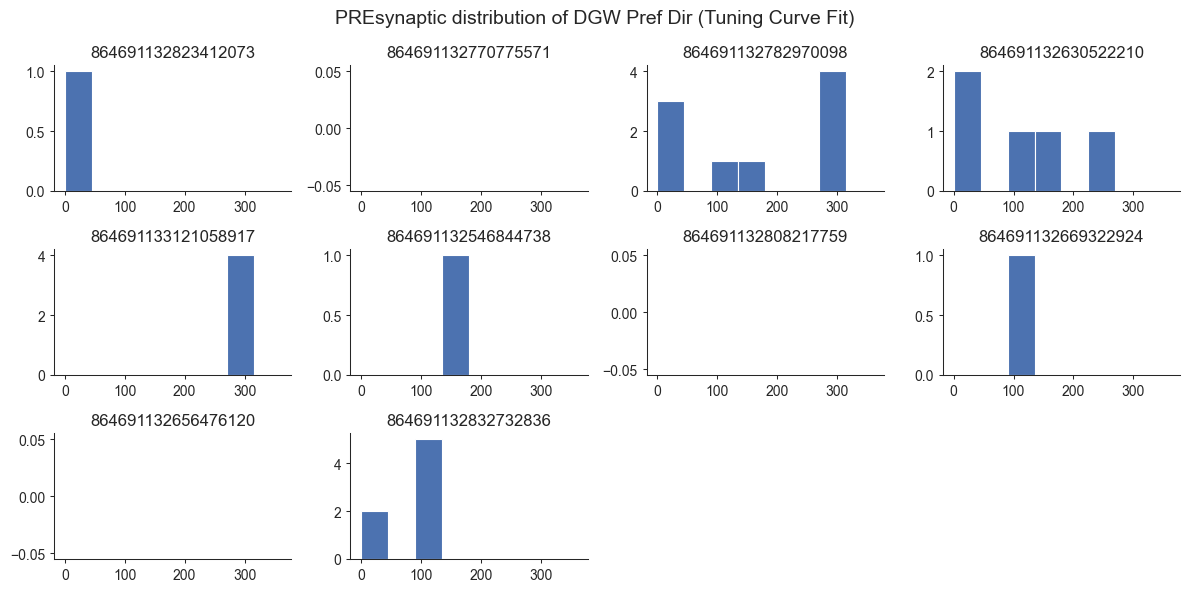

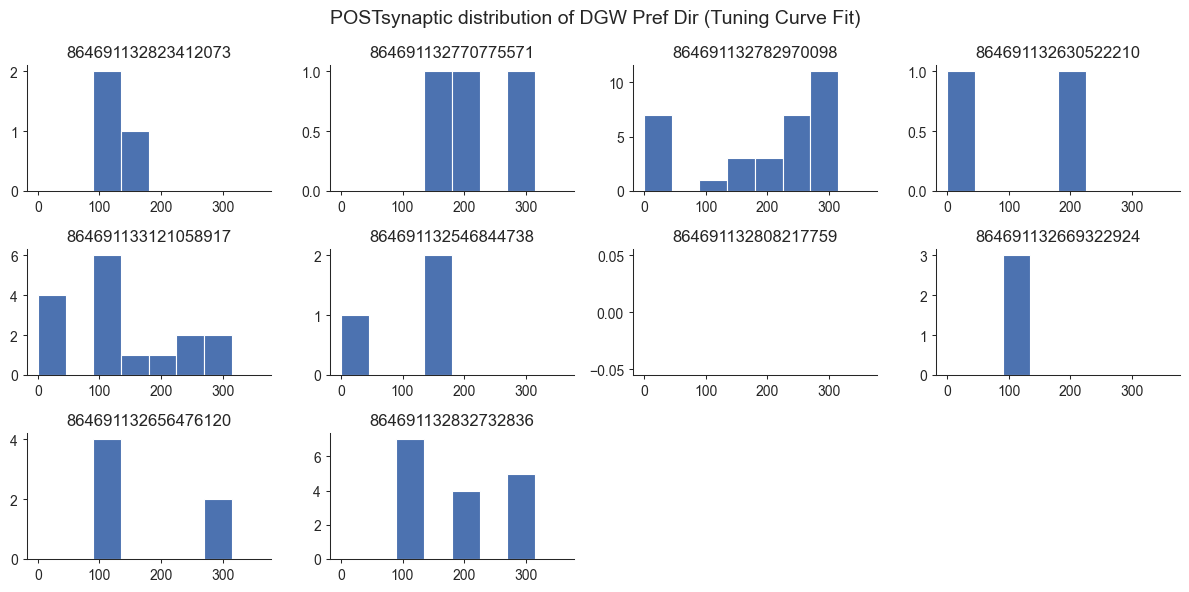

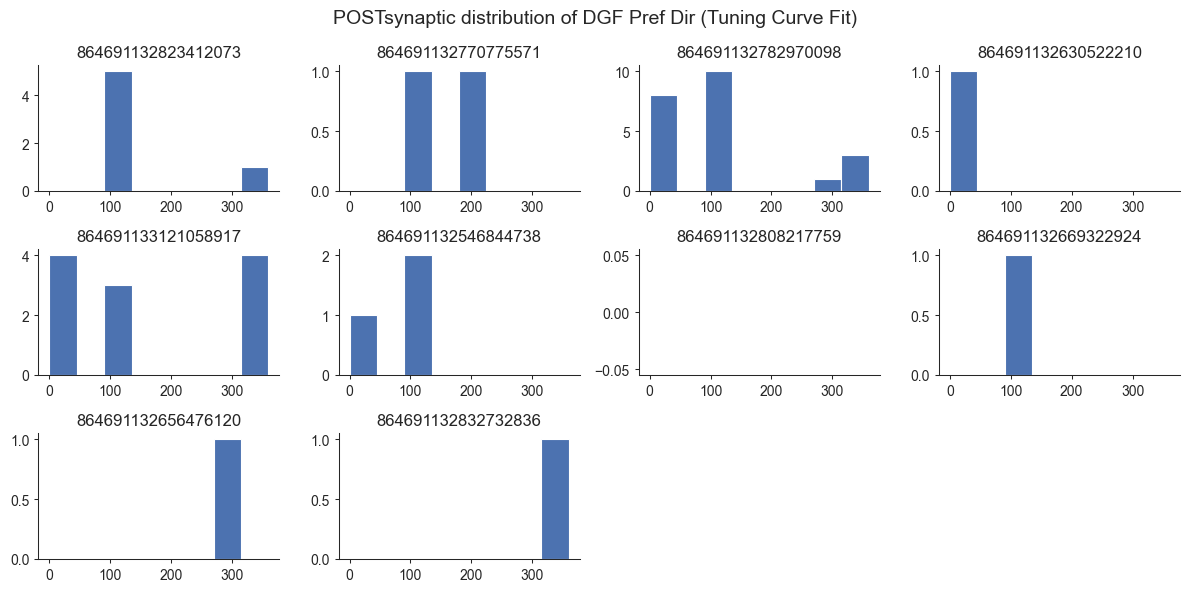

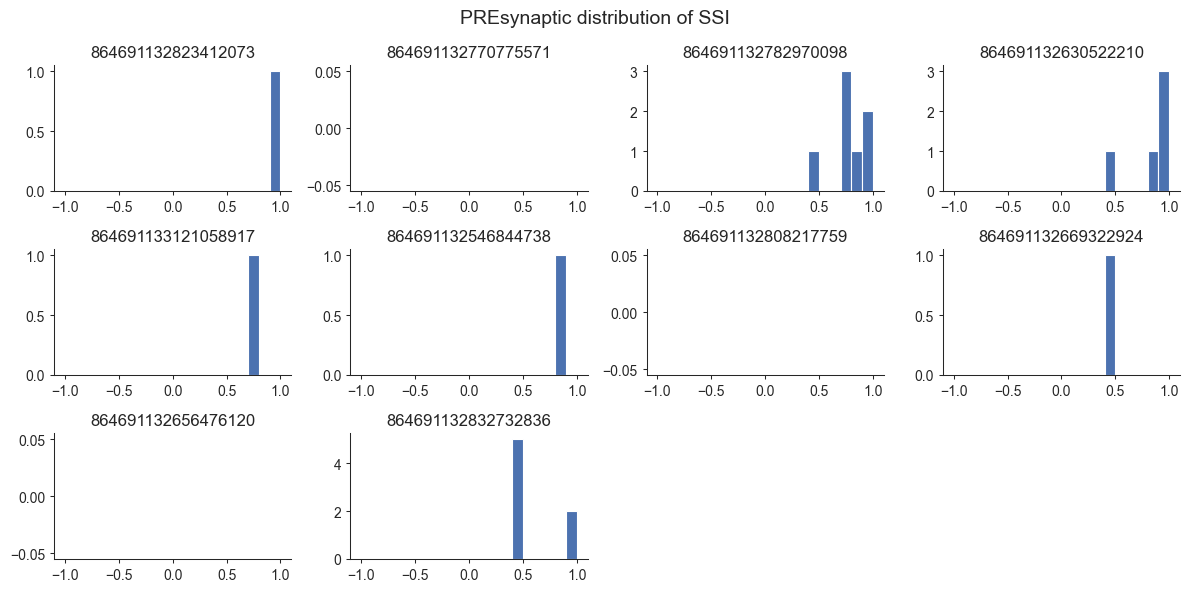

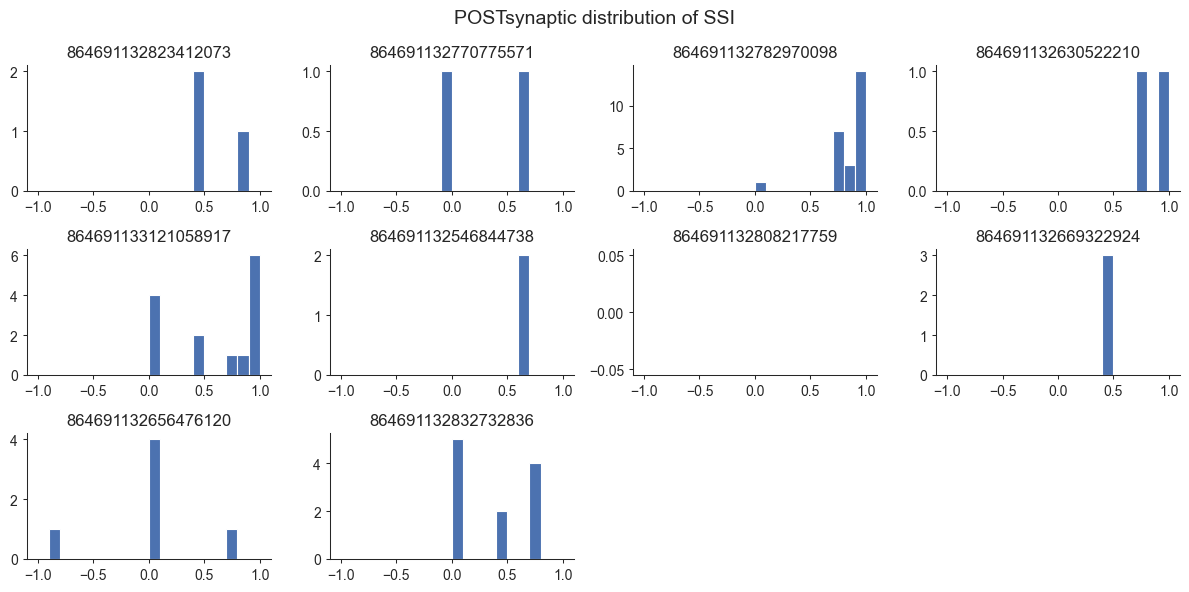

In [86]:
def plot_roi_counts(ax, den_syn, axo_syn, pre_met, post_met):
    bars = [
        ("pre", len(pre_met), "r"),
        ("pre-unq", len(pre_met.index.unique()), "r"),
        ("post", len(post_met), "b"),
        ("post-unq", len(post_met.index.unique()), "b"),
    ]
    bars2 = [
        ("pre-soma", np.mean(~den_syn.pre_soma_position.isna()), "g"),
        ("post-soma", np.mean(~axo_syn.post_soma_position.isna()), "g"),
    ]

    ax2 = ax.twinx()
    for a, b in (ax, bars), (ax2, bars2):
        a.bar([bb[0] for bb in b], [bb[1] for bb in b], color=[bb[2] for bb in b])
        ax.tick_params(axis="x", labelrotation=45)
    ax2.tick_params(axis="y", colors="g")  

dist_fn_euc = lambda this, other: np.sqrt(np.sum(np.square(this - other)))
dist_fn_horiz = lambda this, other: np.sqrt(np.sum(np.square(this[[0, 2]] - other[[0, 2]])))
dist_fn_vert = lambda this, other: other[1] - this[1] # e.g., +200 means other is 200 microns deeper than this

def plot_dist_soma(ax, syn, other_soma_key, dist_fn):
    syn_has_other_soma = syn.dropna(subset=other_soma_key)
    this_soma_key = "pre_soma_position" if other_soma_key == "post_soma_position" else "post_soma_position"
    soma_dists = syn_has_other_soma.apply(lambda row: dist_fn(row[this_soma_key], row[other_soma_key]), axis=1)
    # xmin, xmax = min(0, np.min(soma_dists)), np.max(soma_dists)
    xmin, xmax = 0, 700
    dist_range = np.arange(xmin, xmax+1, 1) # Steps of 1 micron
    frac_cells_within_dist = np.array([np.mean(soma_dists <= d) for d in dist_range])

    ax.plot(dist_range, frac_cells_within_dist)
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.25), xmax=np.argmax(frac_cells_within_dist >= 0.75), color="gray", alpha=0.4)
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.1), xmax=np.argmax(frac_cells_within_dist >= 0.9), color="gray", alpha=0.2)
    # ax.axvline(x=np.argmax(frac_cells_within_dist >= 0.9), color="purple", linestyle="dashed")
    ax.set_xlabel("$\mu$m", fontsize=10)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.twinx().set_ylim(0, ax.get_ylim()[1] * len(soma_dists))

def plot_vert_dist_soma(ax, syn, other_soma_key):
    syn_has_other_soma = syn.dropna(subset=other_soma_key)
    this_soma_key = "pre_soma_position" if other_soma_key == "post_soma_position" else "post_soma_position"
    other_soma_vert_pos = syn_has_other_soma.apply(lambda row: row[other_soma_key][1], axis=1)
    this_soma_vert_pos = syn[this_soma_key].values[0][1] # since all values are the same
    xmin, xmax = 0, 800, # np.max(other_soma_vert_pos)
    dist_range = np.arange(xmin, xmax+1, 1) # Steps of 1 micron
    frac_cells_within_dist = np.array([np.mean(other_soma_vert_pos <= d) for d in dist_range])

    ax.axvline(x=this_soma_vert_pos, color="black", linestyle="dashed")
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.25), xmax=np.argmax(frac_cells_within_dist >= 0.75), color="gray", alpha=0.4)
    ax.axvspan(xmin=np.argmax(frac_cells_within_dist >= 0.1), xmax=np.argmax(frac_cells_within_dist >= 0.9), color="gray", alpha=0.2)
    ax.plot(dist_range, frac_cells_within_dist)
    ax.set_xlabel("Depth ($\mu$m)", fontsize=10)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(0, ax.get_ylim()[1])
    ax.twinx().set_ylim(0, ax.get_ylim()[1] * len(other_soma_vert_pos))

def scatter_soma_soma_dist_vs_syn_soma_dist(ax, syn, other_soma_key, dist_fn):
    # Scatter plot distance between pre- and postsynaptic somas (Y) vs. distance from synapse to postsynaptic soma (X)
    syn_has_other_soma = syn.dropna(subset=other_soma_key)
    mc_soma_key = "pre_soma_position" if other_soma_key == "post_soma_position" else "post_soma_position"
    syn_soma_dists = syn_has_other_soma.apply(lambda row: dist_fn_euc(row["position_microns"], row["post_soma_position"]), axis=1)
    soma_soma_dists = syn_has_other_soma.apply(lambda row: dist_fn(row[mc_soma_key], row[other_soma_key]), axis=1)

    at.density_scatter(x=syn_soma_dists, y=soma_soma_dists, ax=ax, xlabel="syn to postsyn-soma ($\mu$m)", ylabel="soma to soma ($\mu$m)", labelfontsize=10)

def scatter_syn_size_vs_syn_soma_dist(ax, syn, this_soma_key, dist_fn):
    syn_has_this_soma = syn.dropna(subset=this_soma_key)
    syn_sizes = syn_has_this_soma["size"]
    syn_soma_dists = syn_has_this_soma.apply(lambda row: dist_fn(row["position_microns"], row[this_soma_key]), axis=1)
    # syn_soma_dists = syn.apply(lambda row: dist_fn(row["position_microns"], row["post_soma_position"]), axis=1)
    at.density_scatter(x=syn_sizes, y=syn_soma_dists, ax=ax, xlabel="syn to MC-soma ($\mu$m)", ylabel="syn size", labelfontsize=10)

bins_pref_dir = np.arange(0, 360+45, 45)
bins_ssi = np.arange(-1, 1.1, 0.1)

plots = [
    # (
    #     "ROI counts for 2P-corresponded pre- and postsynaptic cells to each MC", 
    #     plot_roi_counts
    # ),
    # (
    #     "Fraction of PREsynaptic cells within a given EUCLIDEAN distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, den_syn, "pre_soma_position", dist_fn_euc)
    # ),
    # (
    #     "Fraction of POSTsynaptic cells within a given EUCLIDEAN distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, axo_syn, "post_soma_position", dist_fn_euc)
    # ),
    # (
    #     "Fraction of PREsynaptic cells within a given HORIZONTAL distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, den_syn, "pre_soma_position", dist_fn_horiz)
    # ),
    # (
    #     "Fraction of POSTsynaptic cells within a given HORIZONTAL distance from MC",
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, axo_syn, "post_soma_position", dist_fn_horiz)
    # ),
    # (
    #     "Fraction of PREsynaptic cells at different cortical depths",
    #     # lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, den_syn, "pre_soma_position", dist_fn_vert)
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_vert_dist_soma(ax, den_syn, "pre_soma_position")
    # ),
    # (
    #     "Fraction of POSTsynaptic cells at different cortical depths",
    #     # lambda ax, den_syn, axo_syn, pre_met, post_met: plot_dist_soma(ax, axo_syn, "post_soma_position", dist_fn_vert)
    #     lambda ax, den_syn, axo_syn, pre_met, post_met: plot_vert_dist_soma(ax, axo_syn, "post_soma_position")
    # ),
    (
        "Horizontal distance between connected somas vs. Distance from MC DENDRITIC synapse to MC soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_soma_soma_dist_vs_syn_soma_dist(ax, den_syn, "pre_soma_position", dist_fn_horiz)
    ),
    (
        "Horizontal distance between connected somas vs. Distance from MC AXONAL synapse to POSTSYNAPTIC soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_soma_soma_dist_vs_syn_soma_dist(ax, axo_syn, "post_soma_position", dist_fn_horiz)
    ),
    (
        "DENDRITIC synapse size vs. Distance from DENDRITIC synapse to MC soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_syn_size_vs_syn_soma_dist(ax, den_syn, "post_soma_position", dist_fn_euc)
    ),
    (
        "AXONAL synapse size vs. Distance from AXONAL synapse to postsynaptic soma",
        lambda ax, den_syn, axo_syn, pre_met, post_met: scatter_syn_size_vs_syn_soma_dist(ax, axo_syn, "post_soma_position", dist_fn_euc)
    ),
    (
        "PREsynaptic distribution of DGW Pref Dir (Tuning Curve Fit)", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(pre_met.dgw_pref_dir[pre_met.dgw_frac_responsive_trials >= 0.5], bins=bins_pref_dir)
    ),
    (
        "POSTsynaptic distribution of DGW Pref Dir (Tuning Curve Fit)", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(post_met.dgw_pref_dir[post_met.dgw_frac_responsive_trials >= 0.5], bins=bins_pref_dir)
    ),
    (
        "POSTsynaptic distribution of DGF Pref Dir (Tuning Curve Fit)", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(post_met.dgf_pref_dir[post_met.dgf_frac_responsive_trials >= 0.5], bins=bins_pref_dir)
    ),
    (
        "PREsynaptic distribution of SSI", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(pre_met.ssi_fit[pre_met.dgw_frac_responsive_trials >= 0.5], bins=bins_ssi)
    ),
    (
        "POSTsynaptic distribution of SSI", 
        lambda ax, den_syn, axo_syn, pre_met, post_met: ax.hist(post_met.ssi_fit[post_met.dgw_frac_responsive_trials >= 0.5], bins=bins_ssi)
    ),
]

for fig_title, plotter in plots:
    fig, axs = plt.subplots(figsize=(12, 6), nrows=3, ncols=4)

    for i, ax in enumerate(axs.flat):
        if i >= len(mc_pt_root_ids):
            ax.axis("off")
            continue
        
        mc_pt_root_id = mc_pt_root_ids[i]
        ax.set_title(f"{mc_pt_root_id}")

        cell_den_syn = dendritic_synapses[dendritic_synapses.post_pt_root_id == mc_pt_root_id]
        cell_den_syn_has_ophys = cell_den_syn[cell_den_syn.pre_pt_root_id.isin(corresponded_table.pt_root_id)]
        presyn_rois = cell_den_syn_has_ophys.pre_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
        presyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[presyn_rois].values]
        
        cell_axo_syn = axonal_synapses[axonal_synapses.pre_pt_root_id == mc_pt_root_id]
        cell_axo_syn_has_ophys = cell_axo_syn[cell_axo_syn.post_pt_root_id.isin(corresponded_table.pt_root_id)]
        postsyn_rois = cell_axo_syn_has_ophys.post_pt_root_id.apply(lambda pt_root_id: corresponding_roi[pt_root_id])
        postsyn_metrics = metrics.loc[roi_lookup_to_metrics_idx[postsyn_rois].values]
        
        plotter(ax, cell_den_syn, cell_axo_syn, presyn_metrics, postsyn_metrics)

    fig.suptitle(fig_title, fontsize=14)
    fig.tight_layout()

    # TODO: Shade background based on SSI? (do this for PCs)
